In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2024-11-04 15:51:15--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2,2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2,25K  --.-KB/s    in 0s      

2024-11-04 15:51:15 (18,2 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
# Load the data
data = pd.read_csv('moore.csv', header=None).to_numpy()

data.shape

(162, 2)

In [9]:
# Get the data
X = data[:,0].reshape(-1, 1)
Y = data[:,1]

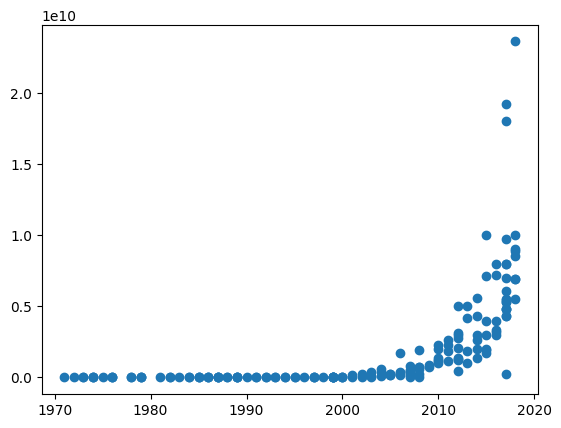

In [10]:
# Plot the data - it is exponential!
plt.scatter(X, Y)

In [11]:
# Since we want a linear model, let's take the log
Y = np.log(Y)

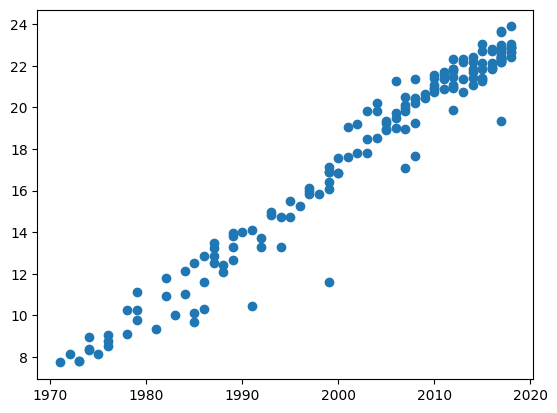

In [12]:
# Plot new data
plt.scatter(X, Y)

In [13]:
# Transform the data
X = X - X.mean()

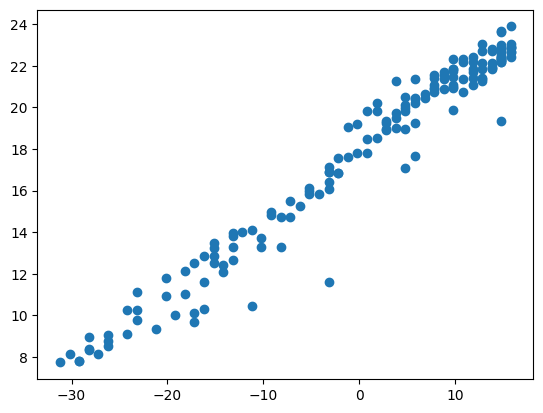

In [14]:
# Plot again
plt.scatter(X, Y)

In [15]:
# Building model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

I0000 00:00:1730746606.472459   15421 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730746606.624108   15421 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730746606.624503   15421 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730746606.630567   15421 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [16]:
# Compile model
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse'
)

In [18]:
# Creating learning rate scheduler
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

# Creating a custom callback
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)
# What is a callback? 
# It's a way to perform actions at various stages of training (e.g. at the start of training, at the end of each epoch, etc.)

In [19]:
# Train model and get results
results = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200


I0000 00:00:1730747790.257991   19931 service.cc:146] XLA service 0x7baa74005ea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730747790.258020   19931 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-11-04 16:16:30.314099: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 322.7674 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 288.8086 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - loss: 352.8331 - learning_rate: 0.0010
Epoch 4/200


I0000 00:00:1730747790.603085   19931 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 217.1557 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 163.3846 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 184.0535 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 109.2841 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 70.8679 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 56.8079 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 35.5619 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 28.2557 - learning_rate: 0.0010
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 20.5369 - learning_rate: 0.0010
Epoch 13/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 25.4407 - learning_rate: 0.0010
Epoch 14/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 20.0002 - learning_rate: 0.0010
Epoch 

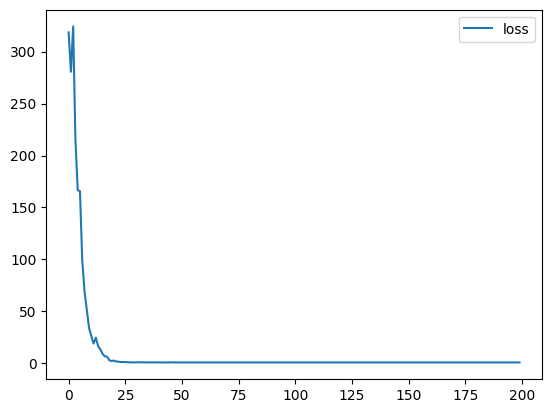

In [ ]:
# Plot the loss
plt.plot(results.history['loss'], label='loss')
plt.legend()

In [22]:
# Get weight from dense layer
print(model.layers[0].get_weights())

[array([[0.35074723]], dtype=float32), array([17.770226], dtype=float32)]


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step


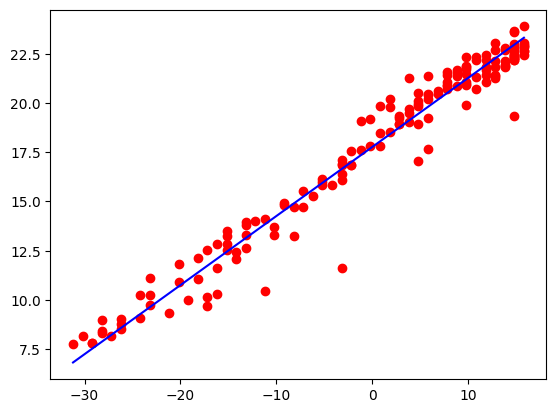

In [24]:
# Plot function and data
Yhat = model.predict(X).flatten()
plt.scatter(X, Y, label='data', color='r')
plt.plot(X, Yhat, label='prediction', color='b')

